In [75]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image_dataset_from_directory
import os


In [76]:
# Define dataset path
data_dir = "./data"

# Load dataset
batch_size = 32
img_size = (160, 160)


# The Data

The dataset used in this project is available at the following link:  
[Microsoft DigiFace-1M Dataset](https://github.com/microsoft/DigiFace1M)

> The DigiFace-1M dataset is a collection of over one million diverse synthetic face images for face recognition.  
> The DigiFace-1M dataset can be used for non-commercial research.  
>   
> The dataset contains:  
>   
> - 720K images with 10K identities (72 images per identity). For each identity, 4 different sets of accessories are sampled and 18 images are rendered for each set.  
> - 500K images with 100K identities (5 images per identity). For each identity, only one set of accessories is sampled.

From the dataset, I am using 32 folders, each representing a class of 3D-rendered synthetic people. Each folder includes 71 photos captured from different angles and lighting conditions.

## Batch Size

Batch size refers to the number of images processed by the model at once. In this case, 32 images are passed through the neural network per batch.

- **Larger Batch Size**: Speeds up training but requires more memory.
- **Smaller Batch Size**: Provides better generalization but slows down training.

## Image Size

Images are resized to 160x160 pixels before being fed into the neural network. This ensures that all input images have the same dimensions for consistency.

In [77]:

train_dataset = image_dataset_from_directory(data_dir,
                                             shuffle=True,
                                             batch_size=batch_size,
                                             image_size=img_size)

# Get class names
class_names = train_dataset.class_names
print("Class names:", class_names)


Found 7216 files belonging to 101 classes.
Class names: ['0', '1', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '2', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '7', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '8', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '9', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99', 'me']


In [78]:
# Normalize images
normalization_layer = layers.Rescaling(1./255)
train_dataset = train_dataset.map(lambda x, y: (normalization_layer(x), y))


In [79]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(160, 160, 3),
                                               include_top=False,
                                               weights="imagenet")

base_model.trainable = False  # Freeze the base model


In [80]:

# Create model
model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(len(class_names), activation='softmax')  # Output layer
])


In [81]:

# Compile model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_160            │ (None, 5, 5, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_6      │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │       163,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 101)            │        13,029 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,434,981 (9.29 MB)

 Trainable params: 176,997 (691.39 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [82]:
epochs = 15

history = model.fit(train_dataset, epochs=epochs)


Epoch 1/15
226/226 ━━━━━━━━━━━━━━━━━━━━ 57s 225ms/step - accuracy: 0.0227 - loss: 4.6269
Epoch 2/15
226/226 ━━━━━━━━━━━━━━━━━━━━ 50s 223ms/step - accuracy: 0.1116 - loss: 3.9199
Epoch 3/15
226/226 ━━━━━━━━━━━━━━━━━━━━ 55s 242ms/step - accuracy: 0.1856 - loss: 3.3383
Epoch 4/15
226/226 ━━━━━━━━━━━━━━━━━━━━ 83s 243ms/step - accuracy: 0.2775 - loss: 2.9014
Epoch 5/15
226/226 ━━━━━━━━━━━━━━━━━━━━ 50s 222ms/step - accuracy: 0.3195 - loss: 2.6616
Epoch 6/15
226/226 ━━━━━━━━━━━━━━━━━━━━ 52s 230ms/step - accuracy: 0.3691 - loss: 2.4514
Epoch 7/15
226/226 ━━━━━━━━━━━━━━━━━━━━ 53s 234ms/step - accuracy: 0.3944 - loss: 2.2419
Epoch 8/15
226/226 ━━━━━━━━━━━━━━━━━━━━ 53s 233ms/step - accuracy: 0.4295 - loss: 2.1414
Epoch 9/15
226/226 ━━━━━━━━━━━━━━━━━━━━ 51s 226ms/step - accuracy: 0.4549 - loss: 2.0379
Epoch 10/15
226/226 ━━━━━━━━━━━━━━━━━━━━ 52s 231ms/step - accuracy: 0.4755 - loss: 1.9045
Epoch 11/15
226/226 ━━━━━━━━━━━━━━━━━━━━ 52s 231ms/step - accuracy: 0.4789 - loss: 1.8668
Epoch 12/15
226/226

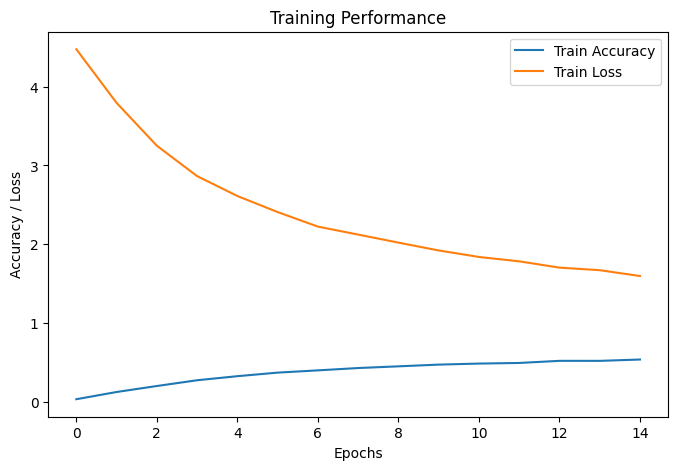

In [ ]:

plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['loss'], label='Train Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy / Loss')
plt.legend()
plt.title('Training Performance')
plt.show()


In [84]:
data_augmentation = keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
    layers.RandomContrast(0.2),
    layers.RandomBrightness(0.2),
    layers.RandomTranslation(height_factor=0.1, width_factor=0.1),
    layers.RandomShear(0.2),
    layers.Rescaling(1./255)  # Normalize again after augmentation
])



In [ ]:
val_split = 0.2  # 20% for validation
train_dataset = image_dataset_from_directory(
    data_dir,
    validation_split=val_split,
    subset="training",
    seed=42,
    batch_size=batch_size,
    image_size=img_size,
    label_mode='categorical'  # Ensure categorical labels
)
val_dataset = image_dataset_from_directory(
    data_dir,
    validation_split=val_split,
    subset="validation",
    seed=42,
    batch_size=batch_size,
    image_size=img_size,
    label_mode='categorical'
)

Found 7216 files belonging to 101 classes.
Using 5773 files for training.


In [86]:
from sklearn.utils.class_weight import compute_class_weight

# Flatten the labels to a 1D array
labels = np.argmax(np.concatenate([y.numpy() for x, y in train_dataset]), axis=1)

# Compute class weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.unique(labels), y=labels)
class_weight_dict = {i: class_weights[i] for i in range(len(class_weights))}

print("Class Weights:", class_weight_dict)

Class Weights: {0: np.float64(0.9219099329287768), 1: np.float64(0.9854899283031752), 2: np.float64(0.9526402640264027), 3: np.float64(0.9854899283031752), 4: np.float64(0.9072764419299073), 5: np.float64(0.9687867091793925), 6: np.float64(0.9219099329287768), 7: np.float64(1.0027792252909502), 8: np.float64(0.9526402640264027), 9: np.float64(0.9854899283031752), 10: np.float64(0.9854899283031752), 11: np.float64(1.0392439243924392), 12: np.float64(0.9854899283031752), 13: np.float64(1.0392439243924392), 14: np.float64(1.0027792252909502), 15: np.float64(0.937023210517773), 16: np.float64(0.9854899283031752), 17: np.float64(0.937023210517773), 18: np.float64(1.0584891822515585), 19: np.float64(0.8531106842027486), 20: np.float64(0.9072764419299073), 21: np.float64(0.9854899283031752), 22: np.float64(1.0027792252909502), 23: np.float64(1.0584891822515585), 24: np.float64(0.8931002475247525), 25: np.float64(1.120753251795768), 26: np.float64(0.9219099329287768), 27: np.float64(1.07846067

In [87]:
base_model.trainable = True  # Unfreeze the base model for fine-tuning
for layer in base_model.layers[:-60]:  # Freeze the initial layers
    layer.trainable = False



In [88]:
# Adding Batch Normalization and Gradient Clipping

model = models.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.BatchNormalization(),  # Normalize activations
    layers.Dense(128, activation='relu', kernel_initializer='he_uniform'),
    layers.Dropout(0.5),
    layers.Dense(len(class_names), activation='softmax')
])

In [89]:

# Recompiling the model with a lower learning rate

optimizer = keras.optimizers.Adam(learning_rate=0.001, clipnorm=1.0)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])



In [90]:

# Adding Callbacks

lr_scheduler = keras.callbacks.ReduceLROnPlateau(monitor='loss',
                                                 factor=0.5,
                                                 patience=3,
                                                 min_lr=1e-6)

early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss',
                                               patience=5,
                                               restore_best_weights=True)



In [ ]:

epochs = 15
history = model.fit(train_dataset, validation_data=val_dataset,epochs=epochs, callbacks=[lr_scheduler, early_stopping])



Epoch 1/15
181/181 ━━━━━━━━━━━━━━━━━━━━ 85s 399ms/step - accuracy: 0.0400 - loss: 5.0364 - learning_rate: 0.0010
Epoch 2/15


c:\Users\mjcul\Github\DataScience\venv\lib\site-packages\keras\src\callbacks\early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss,learning_rate
  current = self.get_monitor_value(logs)


181/181 ━━━━━━━━━━━━━━━━━━━━ 72s 395ms/step - accuracy: 0.1736 - loss: 3.6489 - learning_rate: 0.0010
Epoch 3/15
181/181 ━━━━━━━━━━━━━━━━━━━━ 72s 399ms/step - accuracy: 0.3379 - loss: 2.6746 - learning_rate: 0.0010
Epoch 4/15
181/181 ━━━━━━━━━━━━━━━━━━━━ 70s 386ms/step - accuracy: 0.4701 - loss: 1.9925 - learning_rate: 0.0010
Epoch 5/15
181/181 ━━━━━━━━━━━━━━━━━━━━ 70s 388ms/step - accuracy: 0.5756 - loss: 1.5604 - learning_rate: 0.0010
Epoch 6/15
181/181 ━━━━━━━━━━━━━━━━━━━━ 70s 387ms/step - accuracy: 0.6632 - loss: 1.2270 - learning_rate: 0.0010
Epoch 7/15
181/181 ━━━━━━━━━━━━━━━━━━━━ 70s 387ms/step - accuracy: 0.7071 - loss: 1.0306 - learning_rate: 0.0010
Epoch 8/15
181/181 ━━━━━━━━━━━━━━━━━━━━ 72s 395ms/step - accuracy: 0.7570 - loss: 0.8195 - learning_rate: 0.0010
Epoch 9/15
181/181 ━━━━━━━━━━━━━━━━━━━━ 74s 407ms/step - accuracy: 0.7871 - loss: 0.6798 - learning_rate: 0.0010
Epoch 10/15
181/181 ━━━━━━━━━━━━━━━━━━━━ 71s 394ms/step - accuracy: 0.8462 - loss: 0.5370 - learning_rate: 

In [92]:
# Evaluating the model

test_loss, test_acc = model.evaluate(train_dataset)
print(f"Test Accuracy: {test_acc:.4f}")

181/181 ━━━━━━━━━━━━━━━━━━━━ 41s 221ms/step - accuracy: 0.6530 - loss: 1.9585
Test Accuracy: 0.6749


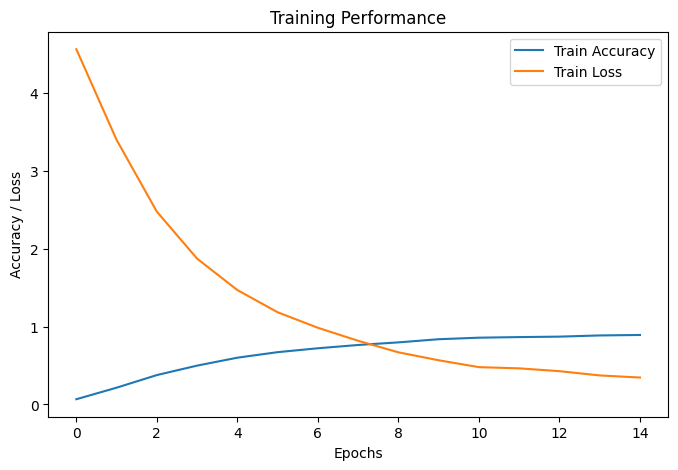

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='dashed')
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss', linestyle='dashed')
plt.xlabel('Epochs')
plt.ylabel('Accuracy / Loss')
plt.legend()
plt.title('Training & Validation Performance')
plt.show()

In [94]:
# save model
model.save("model.h5")
print("Model saved to disk.")

Model saved to disk.
